# 数据集

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(233)
x=np.random.uniform(-4,2,size=(100))
y=x**2+4*x+3+2*np.random.randn(100)
X=x.reshape(-1,1)

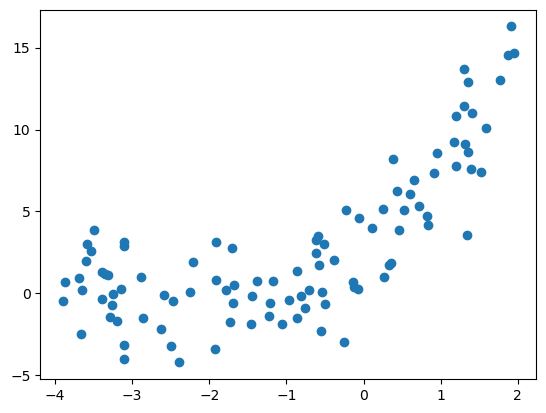

In [3]:
plt.scatter(x,y)
plt.show()

# 欠拟合

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
lin_reg=LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

In [6]:
lin_reg.score(X,y)

0.5273556058762796

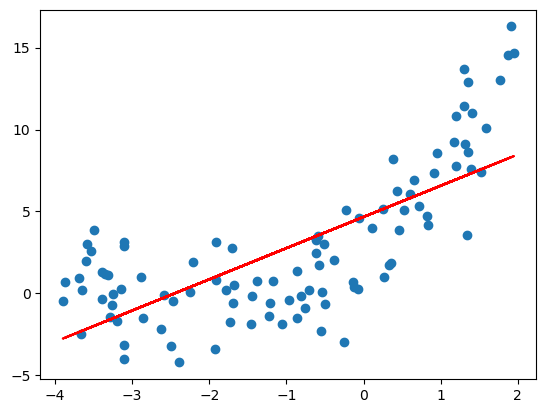

In [7]:
y_predict=lin_reg.predict(X)
plt.scatter(x,y)
plt.plot(x,y_predict,c='r')
plt.show()

# 过拟合

In [8]:
from sklearn.preprocessing import PolynomialFeatures

In [9]:
polynomial_features=PolynomialFeatures(degree=2)
X_poly=polynomial_features.fit_transform(X)

In [10]:
lin_reg.fit(X_poly,y)

LinearRegression()

In [11]:
lin_reg.score(X_poly,y)

0.7961121480231473

In [12]:
y_predict=lin_reg.predict(X_poly)

## 两种方法画

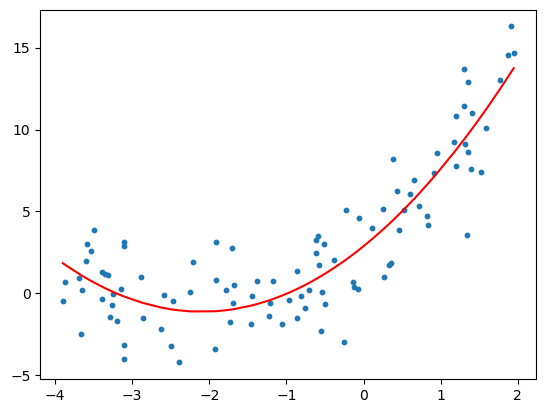

In [13]:
plt.scatter(x,y,s=10)
plt.plot(np.sort(x),y_predict[np.argsort(x)],c='r')
plt.show()

In [14]:
X_new=np.linspace(-5,3,100).reshape(-1,1)
X_new_poly=polynomial_features.fit_transform(X_new)
y_predict=lin_reg.predict(X_new_poly)

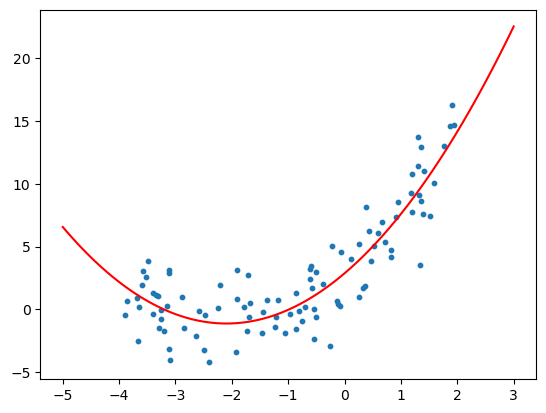

In [16]:
y_predict=lin_reg.predict(X_new_poly)
plt.scatter(x,y,s=10)
plt.plot(X_new,y_predict,c='r')
plt.show()#这种方法可看到多项式回归的整体情况，可自定义区间不局限于样本范围

In [17]:
print("Degree:",2,"Score:",lin_reg.score(X_poly,y))

Degree: 2 Score: 0.7961121480231473


## 实验观察不同维度影响

Degree: 2 Score: 0.7961121480231473
Degree: 5 Score: 0.802124730174001
Degree: 10 Score: 0.8133365407324695
Degree: 15 Score: 0.8243702081978864
Degree: 20 Score: 0.8358688138329252
Degree: 24 Score: 0.8364618295085113


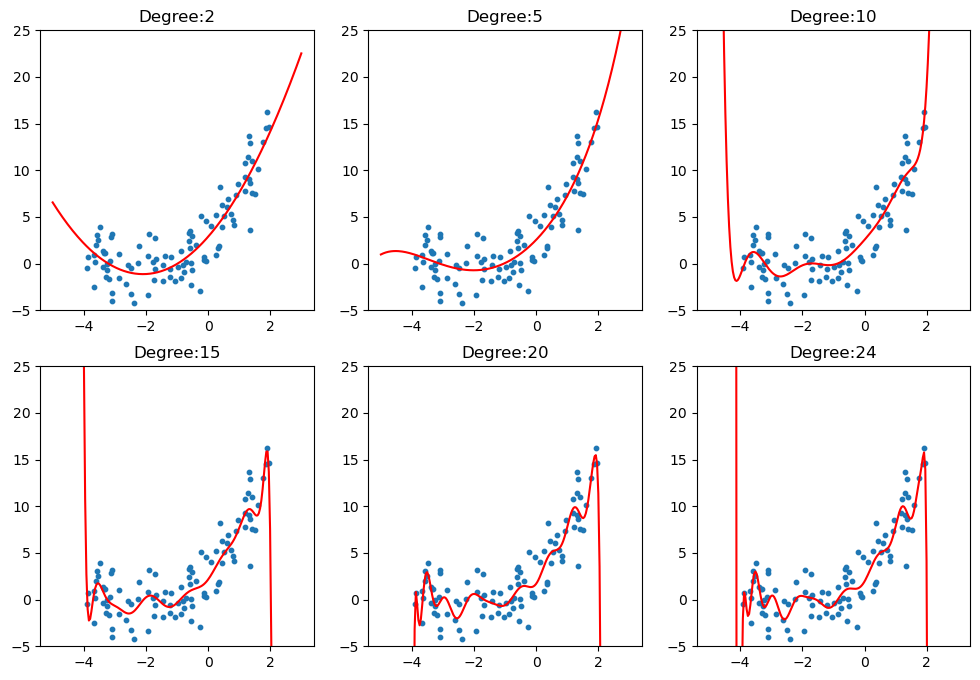

In [18]:
plt.rcParams["figure.figsize"]=(12,8)
degrees=[2,5,10,15,20,24]
for i,degree in enumerate(degrees):
    polynomial_features=PolynomialFeatures(degree=degree)
    X_poly=polynomial_features.fit_transform(X)
    
    lin_reg=LinearRegression()
    lin_reg.fit(X_poly,y)
    
    X_new=np.linspace(-5,3,200).reshape(-1,1)
    X_new_poly=polynomial_features.fit_transform(X_new)
    y_predict=lin_reg.predict(X_new_poly)
    
    plt.subplot(2,3,i+1)
    plt.title("Degree:{0}".format(degree))
    plt.scatter(x,y,s=10)
    plt.ylim(-5,25)
    plt.plot(X_new,y_predict,c='r')
    
    print("Degree:",degree,"Score:",lin_reg.score(X_poly,y))
plt.show()